In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
import torch
from efir.model.layers.multi_head_attention import MultiHeadAttention

batch_size = 4
sequence_length = 64
d: int = 128
num_heads = 3
module = MultiHeadAttention(num_heads=num_heads, d=d)

x = torch.randn(batch_size, sequence_length, d)

y = module(query=x, key=x, value=x)
print(y.shape)

/home/haroun7/anaconda3/envs/efir/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


torch.Size([4, 64, 128])


In [4]:
from efir.model.layers.encoder import Encoder

batch_size = 4
sequence_length = 64
d: int = 128
num_heads = 3
enc = Encoder(num_blocks=2, num_heads=2, d=128)

x = torch.randn(batch_size, sequence_length, d)

y = enc(x, mask=None)

print(y.shape)

torch.Size([4, 64, 128])


In [5]:
import torch
from efir.model.layers.decoder import Transformer
model = Transformer(patch_height=7, patch_width=7, num_channels=1, d=64, d_mlp=64, num_heads=3, pool_size=4, d_out=10)
x = torch.randn(13, 1, 28, 28)
y = model(x)
print(y.shape)

torch.Size([13, 10])


torch.Size([1, 28, 28]) torch.Size([1, 16, 7, 7])


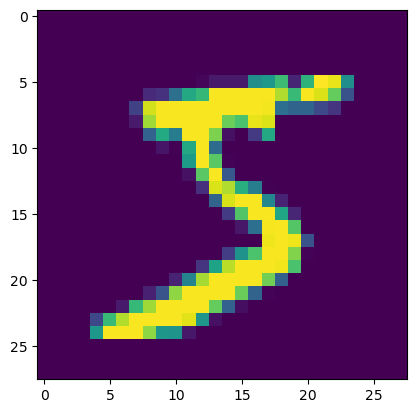

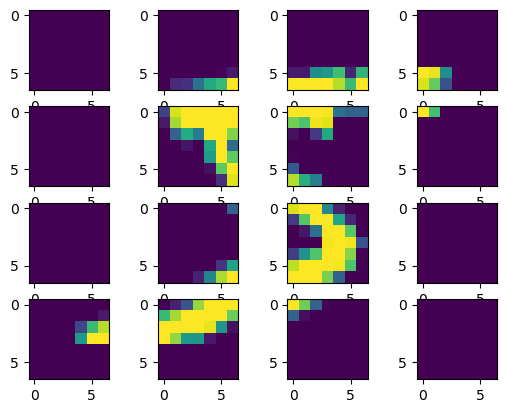

In [3]:
from efir.model.layers.decoder import Patchify
from torchvision import datasets, transforms
import matplotlib.pyplot as plt


patchify = Patchify(7, 7)
dataset = datasets.MNIST(root='../../data/', train=True, download=False, transform=transforms.ToTensor())
img, label = dataset[0]
patched = patchify(img[None, ...]).view(1, -1, 7, 7)
print(img.shape, patched.shape)

plt.imshow(img[0])
plt.show()
fig, axes = plt.subplots(4, 4)
for i in range(4):
    for j in range(4):
        axes[i, j].imshow(patched[0, 4 * i + j, :, :].numpy())
plt.show()